# **House Prices: Advanced Regression Techniques**

Name: Neta Ben Mordechai ID: 211451901  
Name: Itay Chabra ID: 208292458

Link to Kaggle: https://www.kaggle.com/netabenmordechai 

---

## **Overview**  
In this project, the objective is to predict the sale prices of homes in Ames, Iowa, using regression techniques such as Linear Regression and SGDRegressor. The dataset is preprocessed to clean missing values, scale features, and select the most relevant ones based on correlation analysis. Regression models are constructed using these features, and their performance is evaluated using metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). The final model, based on SGDRegressor, leverages the selected features and scaled data to ensure robust predictions. The best-performing model is validated on a test dataset, and predictions are saved for final evaluation.  
The goal is to build a reliable and accurate predictive model for house prices.

---

### Imports

In [499]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error

## Data Investigation and Preprocessing  

---

Import train and test datasets

In [500]:
train = pd.read_csv('houseprices/train.csv')
test = pd.read_csv('houseprices/test.csv')

In [501]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [502]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [503]:
print ("Train: ",train.shape[0],"sales, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"sales, and ",test.shape[1],"features")

Train:  1460 sales, and  81 features
Test:  1459 sales, and  80 features


**Data fields**

- `SalePrice` - the property's sale price in dollars. This is the `target` variable that we are trying to predict.

- MSSubClass: The building class

- MSZoning: The general zoning classification

- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

- Street: Type of road access

- Alley: Type of alley access

- LotShape: General shape of property

- LandContour: Flatness of the property

- Utilities: Type of utilities available

- LotConfig: Lot configuration

- LandSlope: Slope of property

- Neighborhood: Physical locations within Ames city limits

- Condition1: Proximity to main road or railroad

- Condition2: Proximity to main road or railroad (if a second is present)

- BldgType: Type of dwelling

- HouseStyle: Style of dwelling

- OverallQual: Overall material and finish quality

- OverallCond: Overall condition rating

- YearBuilt: Original construction date

- YearRemodAdd: Remodel date

- RoofStyle: Type of roof

- RoofMatl: Roof material

- Exterior1st: Exterior covering on house

- Exterior2nd: Exterior covering on house (if more than one material)

- MasVnrType: Masonry veneer type

- MasVnrArea: Masonry veneer area in square feet

- ExterQual: Exterior material quality

- ExterCond: Present condition of the material on the exterior

- Foundation: Type of foundation

- BsmtQual: Height of the basement

- BsmtCond: General condition of the basement

- BsmtExposure: Walkout or garden level basement walls

- BsmtFinType1: Quality of basement finished area

- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Quality of second finished area (if present)

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating

- HeatingQC: Heating quality and condition

- CentralAir: Central air conditioning

- Electrical: Electrical system

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

- Bedroom: Number of bedrooms above basement level

- Kitchen: Number of kitchens

- KitchenQual: Kitchen quality

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality rating

- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

- GarageType: Garage location

- GarageYrBlt: Year garage was built

- GarageFinish: Interior finish of the garage

- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

- GarageCond: Garage condition

- PavedDrive: Paved driveway

- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality

- Fence: Fence quality

- MiscFeature: Miscellaneous feature not covered in other categories

- MiscVal: $Value of miscellaneous feature

- MoSold: Month Sold

- YrSold: Year Sold

- SaleType: Type of sale

- SaleCondition: Condition of sale

We can drop the `Id` colum since it's unnecessary for the prediction process

In [504]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

**Why Combine Train and Test Datasets?**

This function combines the train and test datasets into a single dataframe (`all_data`) to ensure consistent preprocessing and feature engineering. By merging the datasets:
- We apply transformations (encoding, scaling, handling missing values) uniformly across both train and test sets, avoiding inconsistencies.
- It simplifies feature engineering tasks that require analyzing the entire dataset.
- After preprocessing, the datasets can be split back into their original train and test sets.

In [505]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

In [506]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

## Correlation between features and SalePrice  
We will present a heatmap of the features which have a correlation with the target of 0.5 and above

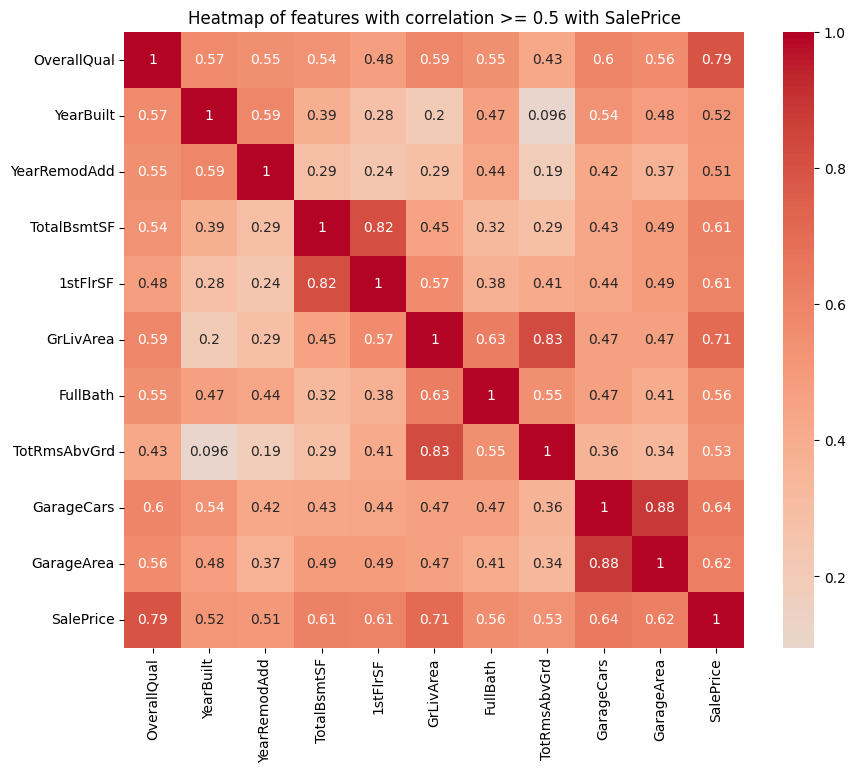

In [507]:
numeric_data = train.select_dtypes(include=['number'])
corr_mat = numeric_data.corr()
high_corr = corr_mat['SalePrice'][abs(corr_mat['SalePrice']) >= 0.5]
high_corr_features = high_corr.index
filtered_corr_mat = corr_mat.loc[high_corr_features, high_corr_features]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_mat, annot=True, cmap='coolwarm', center=0)
plt.title(f'Heatmap of features with correlation >= 0.5 with SalePrice')
plt.show()

We noticed that two features, `GarageArea` and `GarageCars`, have a high correlation of 0.88. Since they provide similar information, we decided to remove one of them to reduce multicollinearity and improve the model's performance.  
To make this decision, we considered the correlation with the target variable, `SalePrice`. Since `GarageArea` has a slightly lower correlation with `SalePrice` compared to `GarageCars`, we chose to drop `GarageArea`.

In [508]:
all_data.drop("GarageArea", axis=1, inplace=True)

## Handle Missing Data

Text(0.5, 1.0, 'Percent missing data by feature')

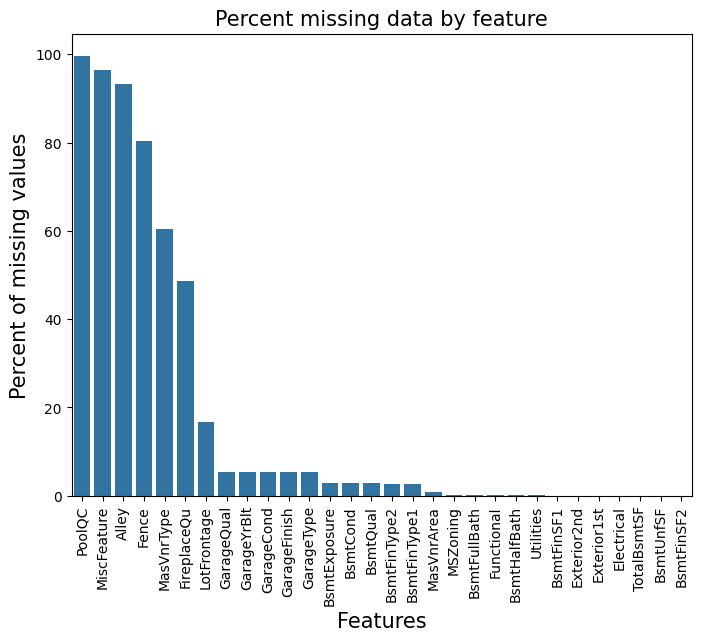

In [509]:
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [510]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

- **PoolQC** : Since PoolQC has the highest null values according to the data documentation says **null values means 'No Pool'.** Since majority of houses has no pool. So we will replace those null values with 'None'.

In [511]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

- **MiscFeature** : Data documentation says NA means "no misc feature"

In [512]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

- **Alley** : data description says NA means "no alley access"

In [513]:
all_data["Alley"] = all_data["Alley"].fillna("None")

- **Fence** : data description says NA means "no fence"

In [514]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- **MasVnrType, MasVnrArea** : data description says NA means "no masonry veneer"

In [515]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")

In [516]:
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **FireplaceQu** : data description says NA means "no fireplace"

In [517]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

- **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [518]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None as per documentation.

In [519]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')

- **GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [520]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)

- **GarageYrBlt** : If GarageYrBlt is missing, and the house has a garage (GarageType != 'None'), we will fill it with the house's YearBuilt or YearRemodAdd.

In [521]:
all_data["GarageYrBlt"] = np.where(
    all_data["GarageType"] != "None",  # Check if the house has a garage
    all_data["GarageYrBlt"].fillna(all_data["YearBuilt"]),  # Fill with YearBuilt or YearRemodAdd if missing
    0  # Otherwise, set to 0 for houses without a garage
)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [522]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement.

In [523]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [524]:
all_data['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

- **MSZoning** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [525]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [526]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

- **Functional** : data description says NA means "Typ"

In [527]:
all_data['Functional'] = all_data['Functional'].fillna("Typ")

- **Electrical,KitchenQual, Exterior1st, Exterior2nd, SaleType** : Since these all are categorical values, its better to replace nan values with the most used keyword.

In [528]:
mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_col:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

- **MSSubClass** : Na most likely means No building class. We can replace missing values with None

In [529]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

- **Utilities** : We will fill the feature with its most frequent value

In [530]:
all_data['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [531]:
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

Now we will check for any missing values

In [532]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


## Removing highly dominated features  

---

Some columns in the dataset may have a single value that appears too often (more than 94% of the time). These dominant values can cause problems because:
- **Lack of Useful Information** : If most of the values are the same, the column doesn’t provide much variability or useful information for the model.
- **Bias in Models** : A column with one dominant value can bias machine learning algorithms, leading them to ignore other potentially important features.
- **Overfitting Risk** : Features with little variance can cause the model to overfit, learning trivial patterns instead of generalizable ones.
By removing columns with dominating values, I ensure that the data has more useful features, helping the model to perform better and generalize well.

In [533]:
def remove_dominating_values(data):
    for col in data.columns:
        if col == 'SalePrice':  # Skip 'SalePrice' column as it is only for training
            continue
        
        most_frequent_val = data[col].mode()[0]  # Getting the most frequent value
        num_most_frequent = len(data[data[col] == most_frequent_val])  # Getting number of occurrences of the most frequent value
        
        if num_most_frequent / len(data) > 0.94:  # Checking if the most frequent value dominates the column
            print(f"Removing column: {col}, Most frequent value: {most_frequent_val}, Frequency: {num_most_frequent / len(data):.2f}")
            data.drop(col, axis=1, inplace=True)  # Remove the column

# Apply the function to all_data
remove_dominating_values(all_data)

Removing column: Street, Most frequent value: Pave, Frequency: 1.00
Removing column: Utilities, Most frequent value: AllPub, Frequency: 1.00
Removing column: LandSlope, Most frequent value: Gtl, Frequency: 0.95
Removing column: Condition2, Most frequent value: Norm, Frequency: 0.99
Removing column: RoofMatl, Most frequent value: CompShg, Frequency: 0.99
Removing column: Heating, Most frequent value: GasA, Frequency: 0.98
Removing column: LowQualFinSF, Most frequent value: 0, Frequency: 0.99
Removing column: BsmtHalfBath, Most frequent value: 0.0, Frequency: 0.94
Removing column: KitchenAbvGr, Most frequent value: 1, Frequency: 0.95
Removing column: 3SsnPorch, Most frequent value: 0, Frequency: 0.99
Removing column: PoolArea, Most frequent value: 0, Frequency: 1.00
Removing column: PoolQC, Most frequent value: None, Frequency: 1.00
Removing column: MiscFeature, Most frequent value: None, Frequency: 0.96
Removing column: MiscVal, Most frequent value: 0, Frequency: 0.96


In [534]:
print(all_data.shape)

(2919, 64)


## Creating new features  

---

- **Total Area Features:**  
    `TotalBsmtSF`, `1stFlrSF` and `2ndFlrSF` - All features together represent the overall livable space in a property, which is a key factor influencing its value.
  we will create a Total area feature to capture the effect of the house's size.

- **Age-Related Features:**  
    `YearBuilt` and `YearRemodAdd`- Newer houses tend to have higher SalePrice.  
    We will create a House age feature to capture the effect of the house's age.

- **Feature Interactions:**  
    `OverallQual` and `GrLivArea` - Both features show strong positive correlations with SalePrice.  
    We will create a new feature to capture the combined effect (OverallQual * GrLivArea).  

In [535]:
# Create a combined area feature
all_data['TotalArea'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] 

# Create an age feature
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']

# Create a combined quality-size feature
all_data['Qual_LivArea'] = all_data['OverallQual'] * all_data['GrLivArea']

It is important to check that all `HouseAge` values are valid, since we can't have negative age

In [536]:
Negatif = all_data[all_data['HouseAge'] < 0]
Negatif

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,TotalArea,HouseAge,Qual_LivArea
2549,20,RL,128.0,39290,None,IR1,Bnk,Inside,Edwards,Norm,...,0,0,None,10,2007,New,Partial,10190.0,-1,50950


We have found a line that have negative `HouseAge`, that means the house was sold before the house was built, which is impossible.  
We have decided to change the `YrSold` to be equal to `YearBuilt`.

In [537]:
all_data.loc[all_data['HouseAge'] == -1, 'YrSold'] = all_data['YearBuilt']
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']  # Recalculate the HouseAge feature

Drop the original features used to create the new ones

In [538]:
all_data.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'YrSold', 'YearBuilt', 'OverallQual', 'GrLivArea'], inplace=True)

In [539]:
display(all_data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,SaleType,SaleCondition,TotalArea,HouseAge,Qual_LivArea
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,CollgCr,Norm,...,61,0,0,None,2,WD,Normal,2566.0,5,11970
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Veenker,Feedr,...,0,0,0,None,5,WD,Normal,2524.0,31,7572
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,CollgCr,Norm,...,42,0,0,None,9,WD,Normal,2706.0,7,12502
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Crawfor,Norm,...,35,272,0,None,2,WD,Abnorml,2473.0,91,12019
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,NoRidge,Norm,...,84,0,0,None,12,WD,Normal,3343.0,8,17584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,None,Reg,Lvl,Inside,MeadowV,Norm,...,0,0,0,None,6,WD,Normal,1638.0,36,4368
2915,160,RM,21.0,1894,None,Reg,Lvl,Inside,MeadowV,Norm,...,24,0,0,None,4,WD,Abnorml,1638.0,36,4368
2916,20,RL,160.0,20000,None,Reg,Lvl,Inside,Mitchel,Norm,...,0,0,0,None,9,WD,Abnorml,2448.0,46,6120
2917,85,RL,62.0,10441,None,Reg,Lvl,Inside,Mitchel,Norm,...,32,0,0,MnPrv,7,WD,Normal,1882.0,14,4850


## Encoding the data  

---

We have chosen to encode the categorical data using the ordinal encoder

In [540]:
ntrain = train.shape[0]
ntest = test.shape[0]

train = all_data[:ntrain].copy()  # Create a deep copy of the sliced data
test = all_data[ntrain:].copy()   # Create a deep copy of the sliced data

train['SalePrice'] = y_train  # Add SalePrice back to train

train.shape

(1460, 61)

In [541]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Separate target and features
t = train['SalePrice']
X = train.drop(columns=['SalePrice'], axis=1)

# Determine categorical and numerical features
def determine_type(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    all_cols = np.array(df.columns)
    return numerical_cols, categorical_cols, all_cols

numerical_cols, categorical_cols, all_cols = determine_type(X)

# Define ColumnTransformer
ct = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("scaling", StandardScaler(), numerical_cols)
])

# Transform training and test sets
X_encoded = pd.DataFrame(ct.fit_transform(X), columns=all_cols)
test_encoded = pd.DataFrame(ct.transform(test), columns=all_cols)

# Display the transformed datasets
print("X encoded")
display(X_encoded)
print("Test encoded")
display(test_encoded)

X encoded


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,SaleType,SaleCondition,TotalArea,HouseAge,Qual_LivArea
0,3.0,1.0,3.0,3.0,4.0,5.0,2.0,0.0,5.0,1.0,...,0.296026,0.311725,-0.752176,0.216503,-0.359325,-0.270208,-1.599111,-0.001277,-1.043259,0.442827
1,3.0,1.0,3.0,3.0,2.0,24.0,1.0,0.0,2.0,1.0,...,0.236495,0.311725,1.626195,-0.704483,-0.359325,-0.270208,-0.489110,-0.052407,-0.183465,-0.405394
2,3.0,1.0,0.0,3.0,4.0,5.0,2.0,0.0,5.0,1.0,...,0.291616,0.311725,-0.752176,-0.070361,-0.359325,-0.270208,0.990891,0.169157,-0.977121,0.545431
3,3.0,1.0,0.0,3.0,0.0,6.0,2.0,0.0,5.0,1.0,...,0.285002,1.650307,-0.752176,-0.176048,4.092524,-0.270208,-1.599111,-0.114493,1.800676,0.452277
4,3.0,1.0,0.0,3.0,2.0,15.0,2.0,0.0,5.0,1.0,...,0.289412,1.650307,0.780197,0.563760,-0.359325,-0.270208,2.100892,0.944631,-0.944052,1.525572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,3.0,3.0,4.0,8.0,2.0,0.0,5.0,1.0,...,0.287207,0.311725,-0.752176,-0.100558,-0.359325,-0.270208,0.620891,0.040114,-0.944052,0.040124
1456,3.0,1.0,3.0,3.0,4.0,14.0,2.0,0.0,2.0,1.0,...,0.240904,0.311725,2.033231,-0.704483,-0.359325,-0.270208,-1.599111,1.275760,-0.150396,0.533088
1457,3.0,1.0,3.0,3.0,4.0,6.0,2.0,0.0,5.0,1.0,...,0.159324,-1.026858,-0.752176,0.201405,-0.359325,-0.270208,-0.489110,1.126022,1.073157,1.293363
1458,3.0,1.0,3.0,3.0,4.0,12.0,2.0,0.0,2.0,3.0,...,0.179168,-1.026858,2.168910,-0.704483,1.473789,-0.270208,-0.859110,-0.500404,0.775536,-0.826226


Test encoded


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,SaleType,SaleCondition,TotalArea,HouseAge,Qual_LivArea
0,2.0,1.0,3.0,3.0,4.0,12.0,1.0,0.0,2.0,1.0,...,0.203422,-1.026858,0.365179,-0.704483,-0.359325,1.882709,-0.119110,-0.960576,0.411777,-1.001733
1,3.0,1.0,0.0,3.0,0.0,12.0,2.0,0.0,2.0,3.0,...,0.196807,-1.026858,2.384400,-0.160950,-0.359325,-0.270208,-0.119110,0.110723,0.510984,-0.327862
2,3.0,1.0,0.0,3.0,4.0,8.0,2.0,0.0,5.0,1.0,...,0.282797,0.311725,0.939819,-0.191147,-0.359325,-0.270208,-1.229111,-0.012233,-0.778707,-0.294882
3,3.0,1.0,0.0,3.0,4.0,8.0,2.0,0.0,5.0,1.0,...,0.285002,0.311725,2.121024,-0.160950,-0.359325,-0.270208,-0.119110,-0.045102,-0.811776,-0.009635
4,3.0,1.0,0.0,1.0,4.0,22.0,2.0,4.0,2.0,1.0,...,0.271773,0.311725,-0.752176,0.533564,-0.359325,2.313293,-1.969111,-0.008581,-0.613362,0.109170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4.0,1.0,3.0,3.0,4.0,10.0,2.0,3.0,5.0,1.0,...,-4.120324,-2.365440,-0.752176,-0.704483,-0.359325,-0.270208,-0.119110,-1.131010,-0.018120,-1.023334
1455,4.0,1.0,3.0,3.0,4.0,10.0,2.0,4.0,5.0,1.0,...,0.223266,-1.026858,-0.752176,-0.342128,-0.359325,-0.270208,-0.859110,-1.131010,-0.018120,-1.023334
1456,3.0,1.0,3.0,3.0,4.0,11.0,2.0,0.0,2.0,1.0,...,0.201217,0.311725,3.030870,-0.704483,-0.359325,-0.270208,0.990891,-0.144928,0.312570,-0.685435
1457,3.0,1.0,3.0,3.0,4.0,11.0,2.0,0.0,6.0,1.0,...,-4.120324,-2.365440,-0.113687,-0.221343,-0.359325,-0.270208,0.250891,-0.833968,-0.745638,-0.930373


## Remove low correlation features  

---

Low-correlation features were removed to simplify the model and focus on features with a stronger relationship to the target variable `SalePrice`.  
Features with very low correlation contribute little to predicting the target and can add unnecessary noise, increasing the complexity of the model and potentially leading to overfitting or poor generalization. By filtering out these features, we aim to enhance model performance, reduce computational cost, and improve interpretability.

In [542]:
# Combine encoded features and target variable for correlation analysis
encoded_data = pd.concat([X_encoded, t.reset_index(drop=True)], axis=1)

# Compute correlation matrix for the encoded data
corr_mat = encoded_data.corr()

# Set low-correlation threshold
corr_threshold = 0.2

# Identify low-correlation features with respect to SalePrice
low_corr = corr_mat['SalePrice'][abs(corr_mat['SalePrice']) < corr_threshold]
low_corr_features = low_corr.index.tolist()

# Remove low-correlation features from both X_encoded and test_encoded
X_filtered = X_encoded.drop(columns=[feature for feature in low_corr_features if feature in X_encoded.columns])
test_filtered = test_encoded.drop(columns=[feature for feature in low_corr_features if feature in test_encoded.columns])

# Visualize the remaining correlations in the training data
# Filter correlation matrix to include only high-correlation features
high_corr_features = corr_mat['SalePrice'][abs(corr_mat['SalePrice']) >= corr_threshold].index
filtered_corr_mat = corr_mat.loc[high_corr_features, high_corr_features]

print(f"Dropped low-correlation features: {low_corr_features}")

Dropped low-correlation features: ['MSSubClass', 'MSZoning', 'LotArea', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtFinType1', 'BsmtFinSF1', 'Electrical', 'BsmtFullBath', 'HalfBath', 'TotRmsAbvGrd', 'GarageType', 'GarageCond', 'MoSold', 'SaleType', 'SaleCondition']


In [543]:
print("X filtered size: ", X_filtered.shape)
print("test filtered size: ", test_filtered.shape)

X filtered size:  (1460, 35)
test filtered size:  (1459, 35)


## New correlation between features and SalePrice  

---

We will present a heatmap of the features which have a correlation with the target after the changes we made on the data.

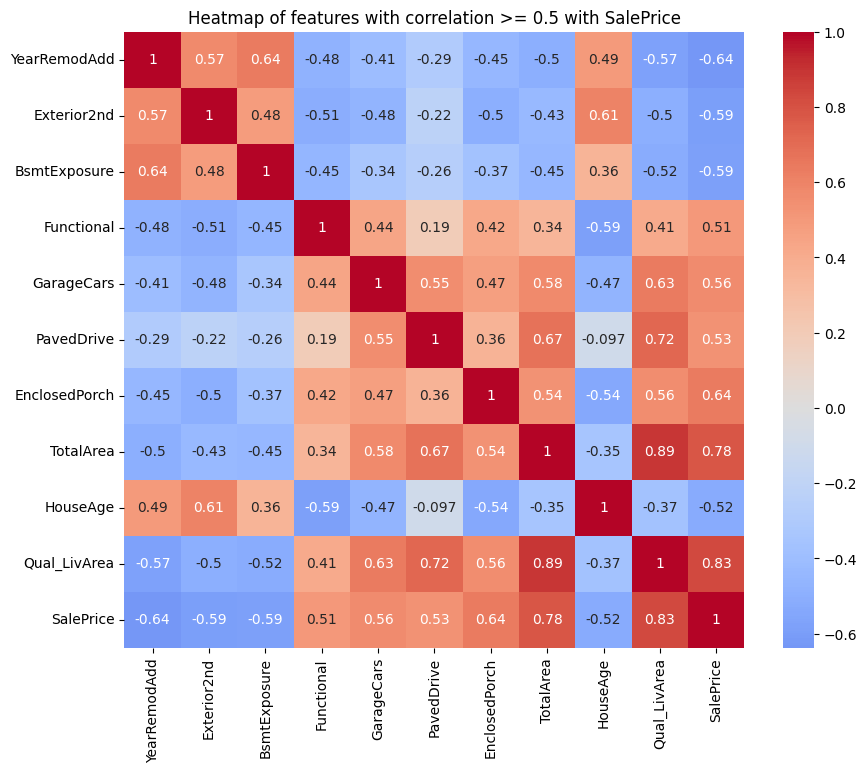

In [544]:
# Add SalePrice back to the data temporarily for correlation analysis
X_with_target = X_encoded.copy()
X_with_target['SalePrice'] = t  # Adding 'SalePrice' from the original training data

# Compute the correlation matrix including SalePrice
corr_mat = X_with_target.corr()

# Set a high correlation threshold (e.g., 0.5)
high_corr = corr_mat['SalePrice'][abs(corr_mat['SalePrice']) >= 0.5]

# Extract high correlation features
high_corr_features = high_corr.index

# Filter the correlation matrix for only the high-correlation features
filtered_corr_mat = corr_mat.loc[high_corr_features, high_corr_features]

# Plot the heatmap of the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_mat, annot=True, cmap='coolwarm', center=0)
plt.title(f'Heatmap of features with correlation >= 0.5 with SalePrice')
plt.show()

There is high correlation between `Qual_LivArea` and `TotalArea`, but since they capture distinct aspects (quality vs. size), it might be better to keep both.

In [545]:
# Identify features with correlation > 0.5 with SalePrice
high_corr_features = filtered_corr_mat.columns

# Filter X_filtered and test_filtered to keep only high correlation features
X_high_corr = X_with_target[high_corr_features]

high_corr_features = high_corr_features.drop('SalePrice', errors='ignore')
test_high_corr = test_filtered[high_corr_features]

# Display the shapes of the filtered datasets
print("Filtered X shape:", X_high_corr.shape)
print("Filtered test shape:", test_high_corr.shape)

Filtered X shape: (1460, 11)
Filtered test shape: (1459, 10)


In [546]:
X_high_corr.info()
test_high_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearRemodAdd   1460 non-null   float64
 1   Exterior2nd    1460 non-null   float64
 2   BsmtExposure   1460 non-null   float64
 3   Functional     1460 non-null   float64
 4   GarageCars     1460 non-null   float64
 5   PavedDrive     1460 non-null   float64
 6   EnclosedPorch  1460 non-null   float64
 7   TotalArea      1460 non-null   float64
 8   HouseAge       1460 non-null   float64
 9   Qual_LivArea   1460 non-null   float64
 10  SalePrice      1460 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 125.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearRemodAdd   1459 non-null   float64
 1   Exterior2nd    1459 non-

## Dealing with outliers  
Outliers are data points that significantly differ from the rest of the data. They can be unusually high or low compared to the other observations in the dataset.  

**Improving model performance** - Outliers can distort the model’s learning process, particularly for models that are sensitive to extreme values, such as linear regression. They can skew the results and lead to inaccurate predictions. By handling outliers, we can help the model learn more meaningful patterns from the data.

---

We use scatter plots to visualize the relationship between each feature and the target variable, `SalePrice`.  
Outliers are often represented as data points that are far away from the general trend or cluster of data points.

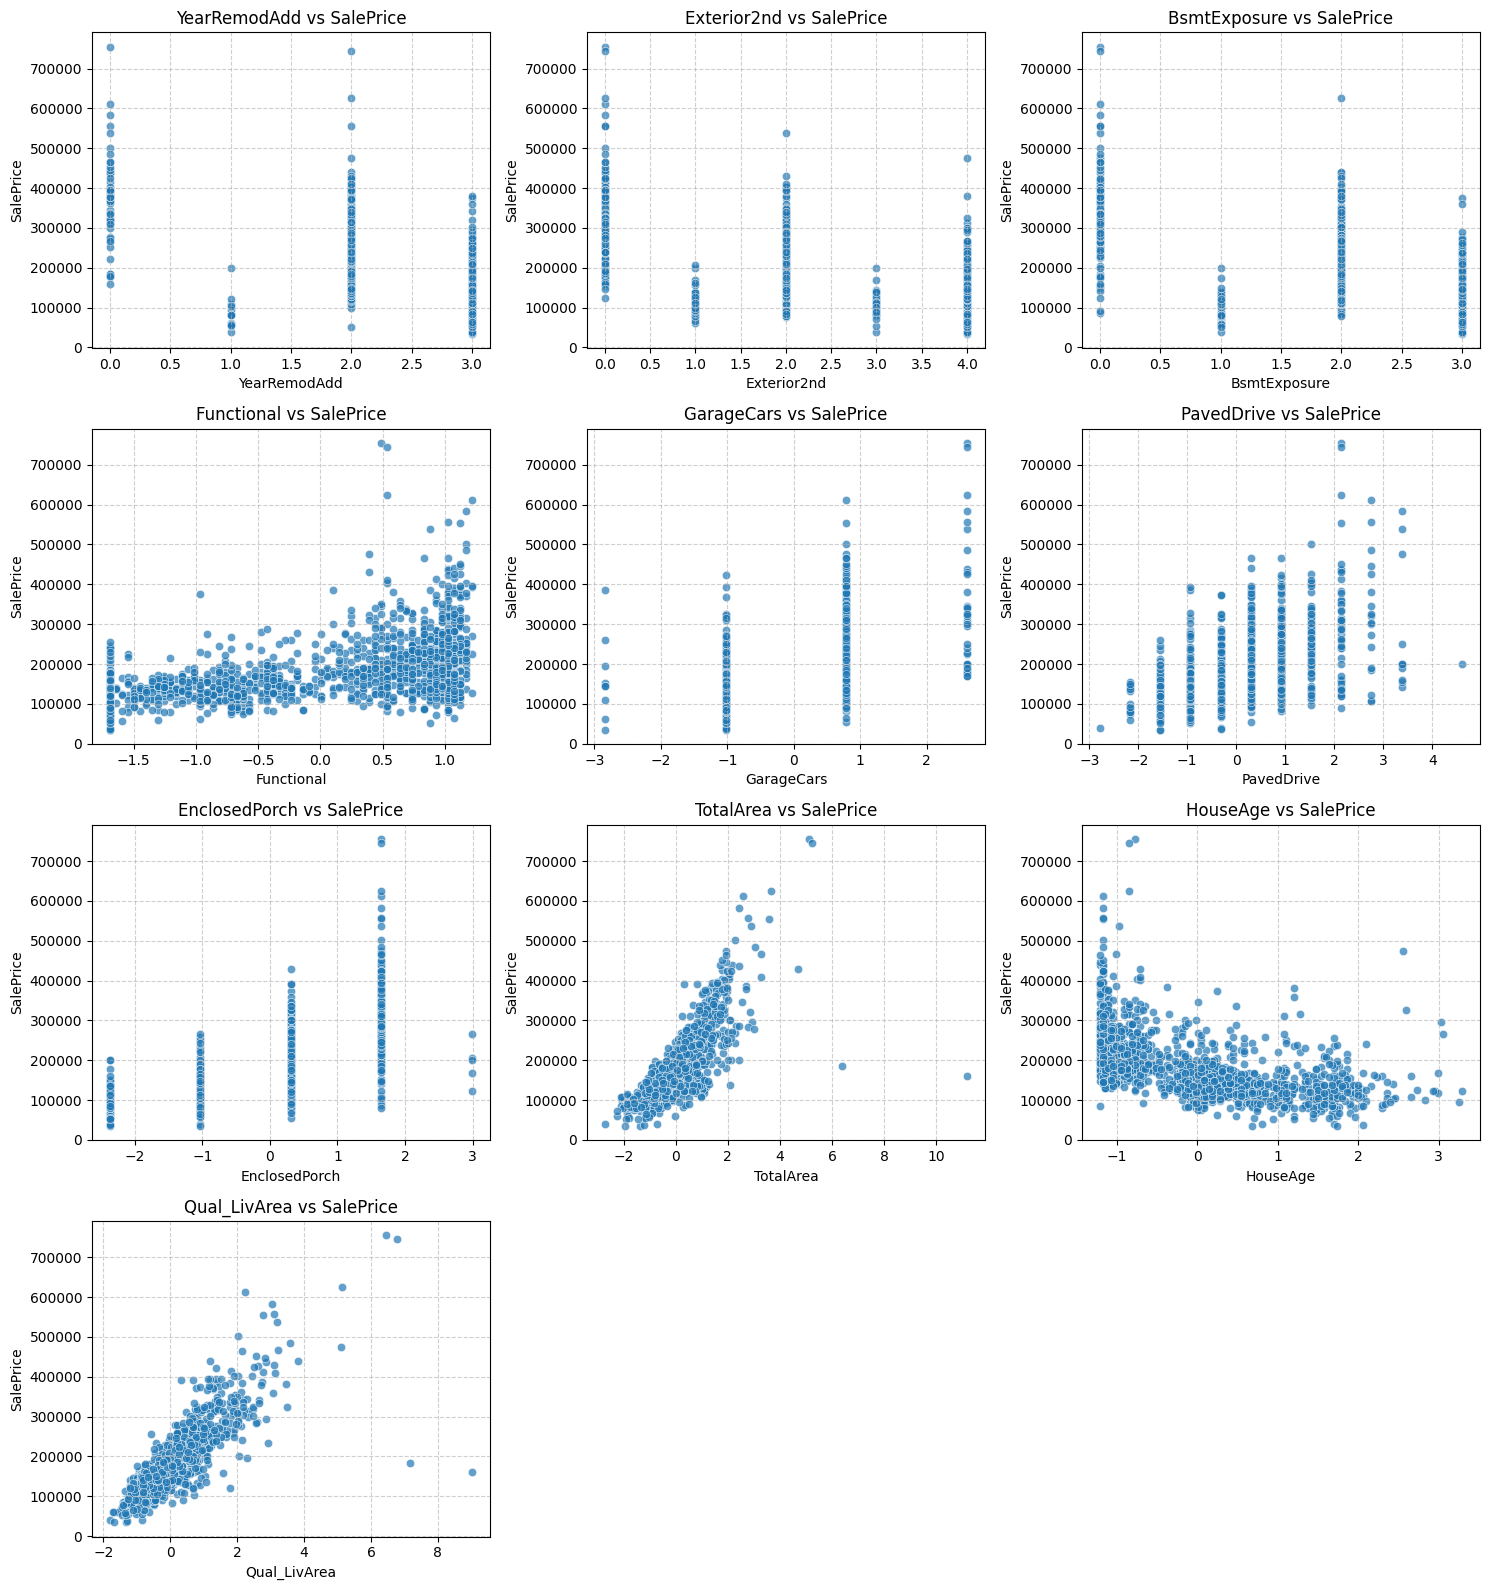

In [547]:
def scatter_plot_features_vs_saleprice(df, features, target='SalePrice', cols=3):
    rows = (len(features) + cols - 1) // cols  # Calculate required rows
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  # Flatten to simplify indexing
    
    for i, feature in enumerate(features):
        sns.scatterplot(data=df, x=feature, y=target, alpha=0.7, ax=axes[i])
        axes[i].set_title(f'{feature} vs {target}', fontsize=12)
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel(target, fontsize=10)
        axes[i].grid(True, linestyle='--', alpha=0.6)
    
    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()  # Adjust layout for readability
    plt.show()

# Call the function for all features except 'SalePrice'
features = X_high_corr.columns.drop('SalePrice')
scatter_plot_features_vs_saleprice(X_high_corr, features, cols=3)


Now we manually remove outliers for each feature

In [548]:
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['YearRemodAdd'] == 2) & (X_high_corr['SalePrice'] > 500000)].index)
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['YearRemodAdd'] == 2) & (X_high_corr['SalePrice'] < 100000)].index)
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['YearRemodAdd'] == 1) & (X_high_corr['SalePrice'] > 150000)].index)
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['YearRemodAdd'] == 0) & (X_high_corr['SalePrice'] > 700000)].index)

In [549]:
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['Exterior2nd'] == 2) & (X_high_corr['SalePrice'] > 500000)].index)
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['Exterior2nd'] == 4) & (X_high_corr['SalePrice'] > 350000)].index)
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['Exterior2nd'] == 0) & (X_high_corr['SalePrice'] > 700000)].index)

In [550]:
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['BsmtExposure'] == 0) & (X_high_corr['SalePrice'] > 700000)].index)
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['BsmtExposure'] == 2) & (X_high_corr['SalePrice'] > 600000)].index)
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['BsmtExposure'] == 3) & (X_high_corr['SalePrice'] > 300000)].index)

In [551]:
X_high_corr = X_high_corr.drop(X_high_corr[X_high_corr['Functional'] > 600000].index)

In [552]:
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['GarageCars'] > 2) & (X_high_corr['SalePrice'] > 700000)].index)
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['GarageCars'] > 0) & (X_high_corr['GarageCars'] < 1) & (X_high_corr['SalePrice'] > 600000)].index)

In [553]:
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['PavedDrive'] > 1) & (X_high_corr['SalePrice'] > 500000)].index)
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['PavedDrive'] > 4) & (X_high_corr['SalePrice'] > 0)].index)
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['PavedDrive'] < -2.5) & (X_high_corr['SalePrice'] > 0)].index)

In [554]:
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['EnclosedPorch'] > 1) & (X_high_corr['SalePrice'] > 700000)].index)

In [555]:
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['TotalArea'] > 4) | (X_high_corr['SalePrice'] > 500000)].index)

In [556]:
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['HouseAge'] > 2.5) | (X_high_corr['SalePrice'] > 500000)].index)

In [557]:
X_high_corr = X_high_corr.drop(X_high_corr[(X_high_corr['Qual_LivArea'] > 4)].index)

Let's see the changes to the graphs

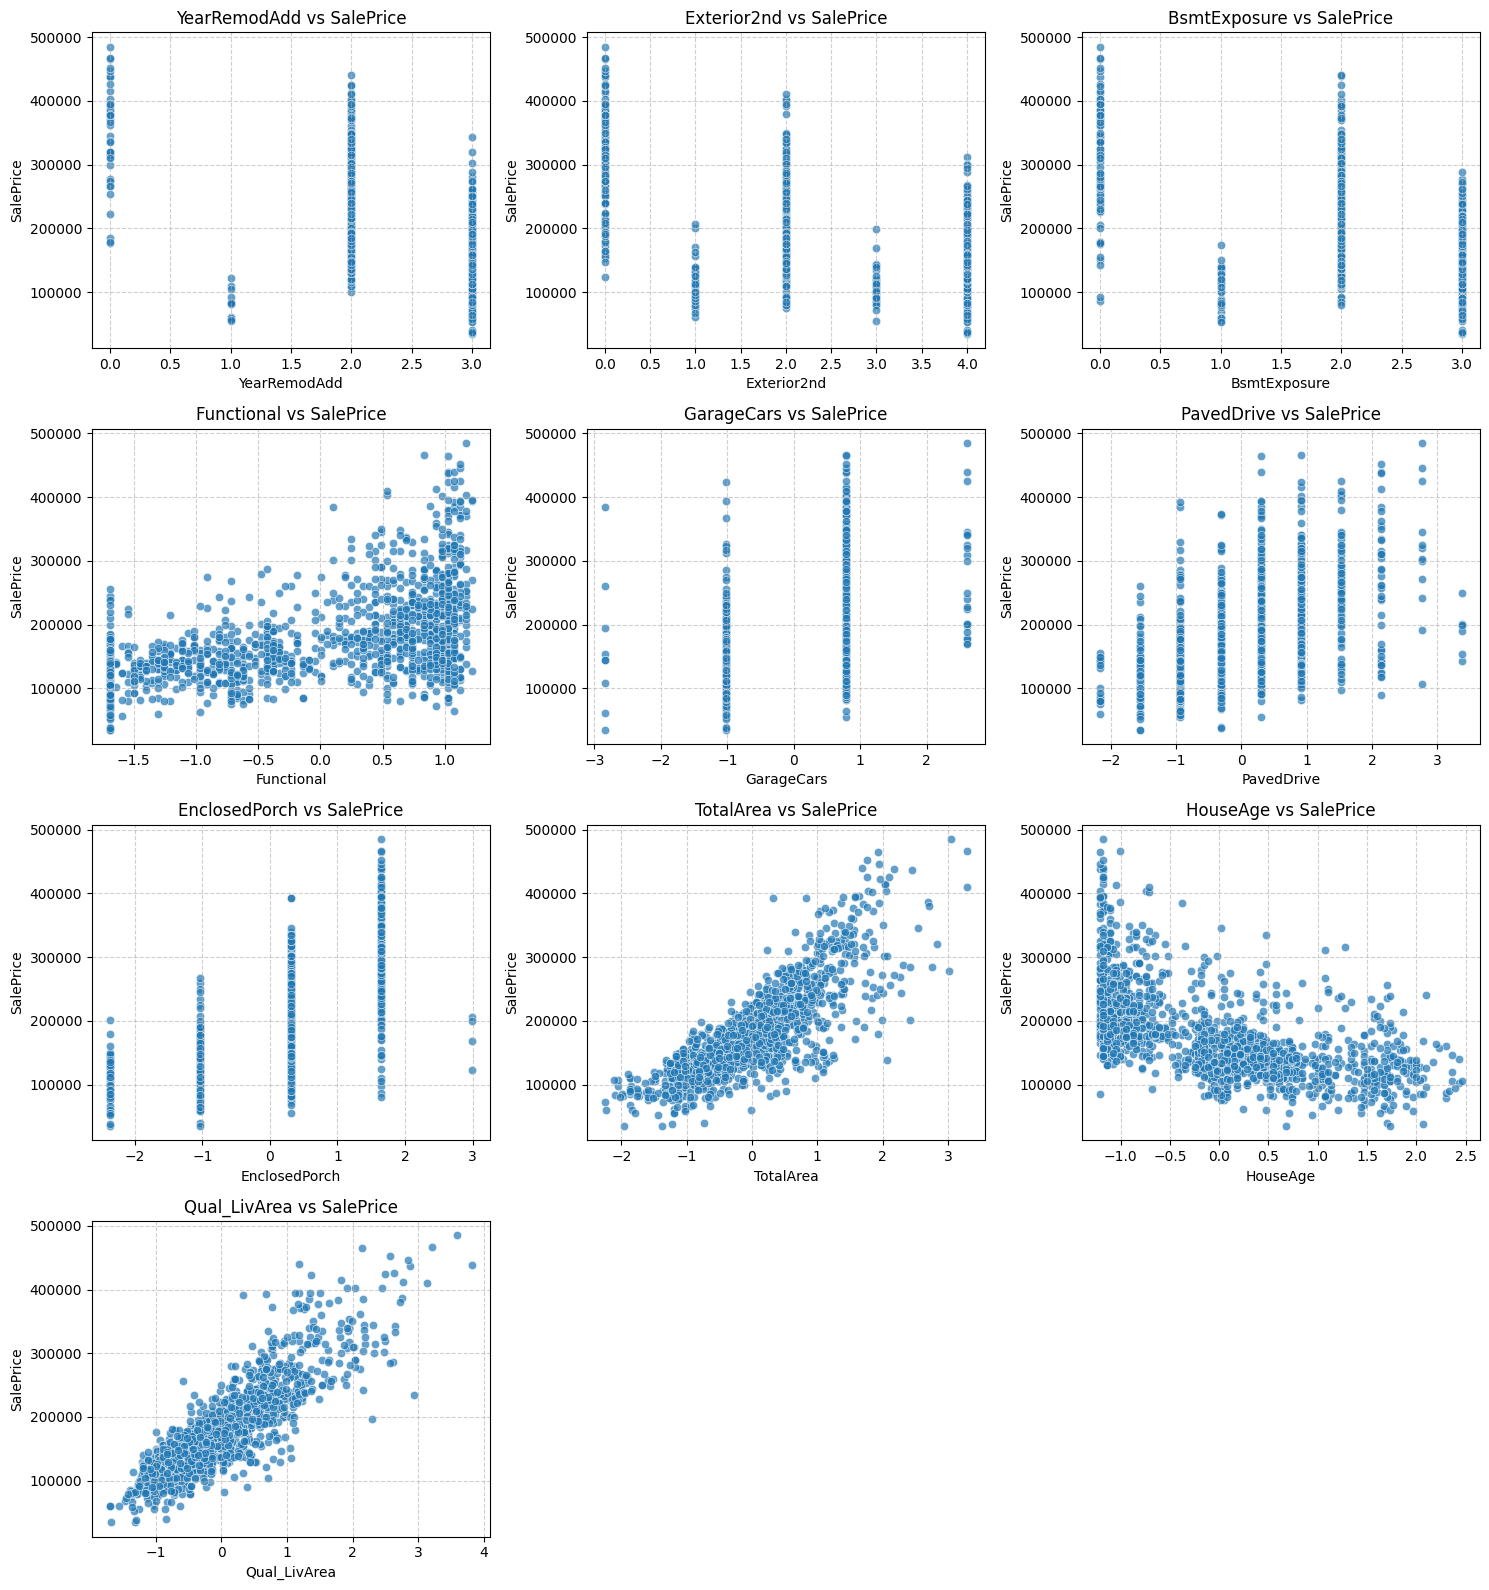

In [558]:
scatter_plot_features_vs_saleprice(X_high_corr, features, cols=3)

## Model Selection and Evaluation  
We decided to use the SGDRegressor (Stochastic Gradient Descent Regressor) as our final model for predicting the house prices.  
The SGDRegressor is suitable for our dataset because it can efficiently handle large datasets and works well for both linear and non-linear relationships. It is also less prone to overfitting when combined with appropriate regularization.  

---

In [559]:
X = X_high_corr.drop('SalePrice', axis=1)
y = X_high_corr['SalePrice']

In [560]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [561]:
X_train_selected = X_train[high_corr_features]
X_test_selected = X_test[high_corr_features]

In [562]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [563]:
# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Linear Regression Model MSE: {mse}")
print(f"Linear Regression Model RMSE: {rmse}")

Linear Regression Model MSE: 679636200.2128353
Linear Regression Model RMSE: 26069.83314509004


In [564]:
# Initialize the SGD Regressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Create the pipeline
pipeline_model = make_pipeline(StandardScaler(), sgd_regressor)

# Fit the pipeline on the selected training data
pipeline_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_sgd = pipeline_model.predict(X_test_selected)

# Evaluate the model
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)

print(f"SGD Regression Model MSE: {mse_sgd}")
print(f"SGD Regression Model RMSE: {rmse_sgd}")

SGD Regression Model MSE: 677929669.88656
SGD Regression Model RMSE: 26037.08259169141


## Training vs Validation Loss Analysis  
The graph below illustrates the training and validation loss (Mean Squared Error, MSE) over multiple epochs during the model training process.   

---

Key observations:  
- **Convergence**: Both losses decrease rapidly in the first few epochs, then stabilize, indicating the model has learned the data patterns.
- **No Overfitting**: Training and validation losses remain close, showing good generalization.
- **Validation Loss**: Slightly lower validation loss suggests a well-regularized model.  

This indicates the model is well-tuned, with balanced training and validation performance. Future steps could include early stopping to save time or further hyperparameter tuning for optimization.

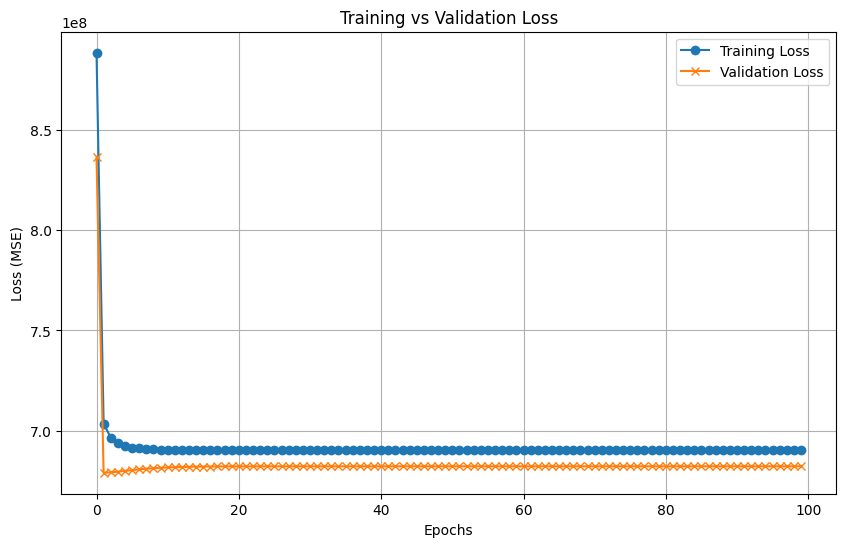

In [565]:
X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train)
X_test_scaled = np.array(X_test_scaled)
y_test = np.array(y_test)

# Initialize the model
sgd_regressor = SGDRegressor(max_iter=1, warm_start=True, tol=None, random_state=42)

# Variables to store loss
train_losses = []
val_losses = []

# Number of epochs
epochs = 100

for epoch in range(epochs):
    # Train the model for one epoch
    sgd_regressor.fit(X_train_scaled, y_train)
    
    # Predict on training and validation sets
    y_train_pred = sgd_regressor.predict(X_train_scaled)
    y_test_pred = sgd_regressor.predict(X_test_scaled)
    
    # Calculate training and validation loss (MSE)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_test_pred)
    
    # Append losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label="Training Loss", marker='o')
plt.plot(range(epochs), val_losses, label="Validation Loss", marker='x')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

## Exporting model results

In [566]:
X_test = test_encoded[high_corr_features]
predictions = pipeline_model.predict(X_test)

output = pd.DataFrame({'Id': test_ID,
                      'SalePrice': predictions})

output.to_csv('submission.csv', index= False)

print("Saved the predictions to a .csv file")

Saved the predictions to a .csv file


## **Submission in Kaggle**  
We will now apply this trained model to make predictions on the test set and submit the results in the required format.  

---

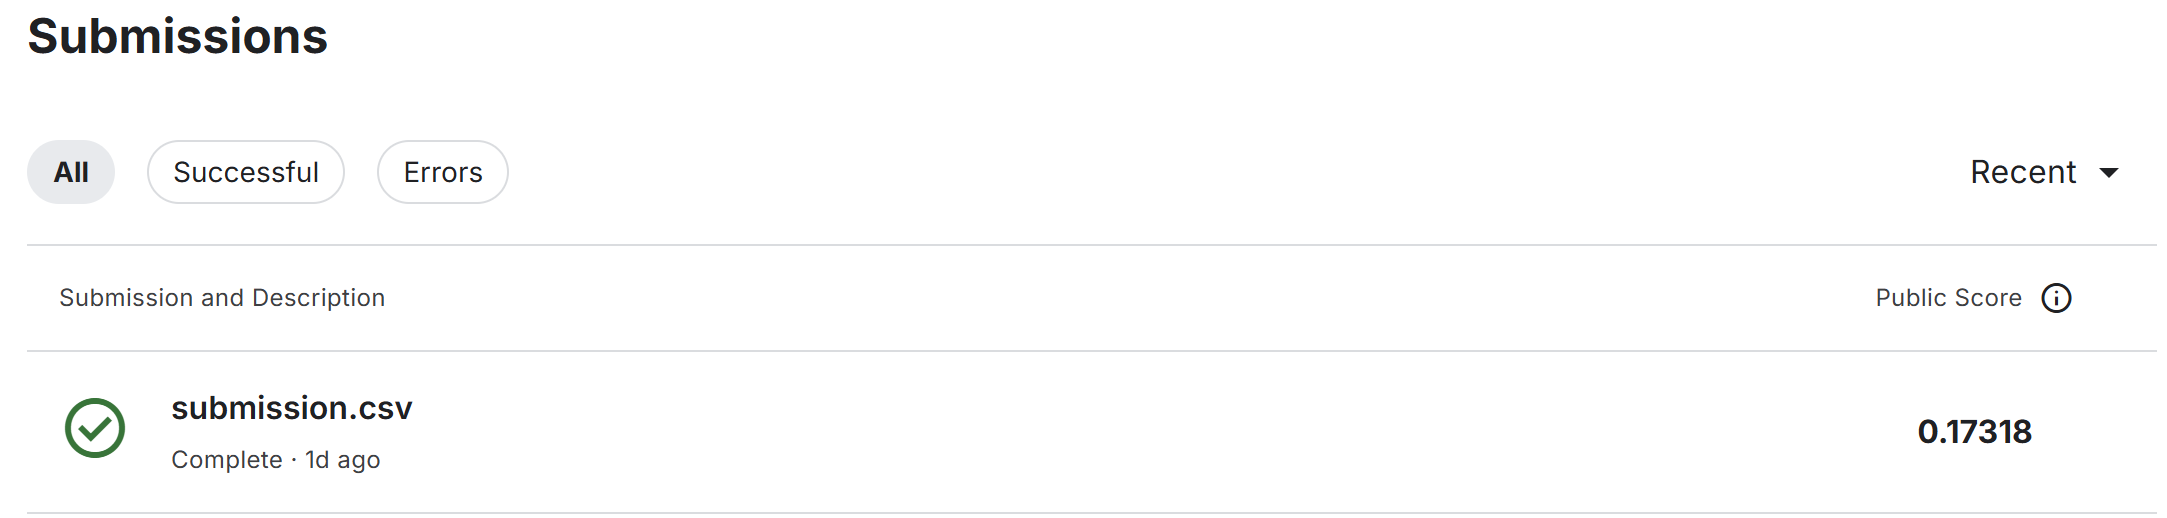

[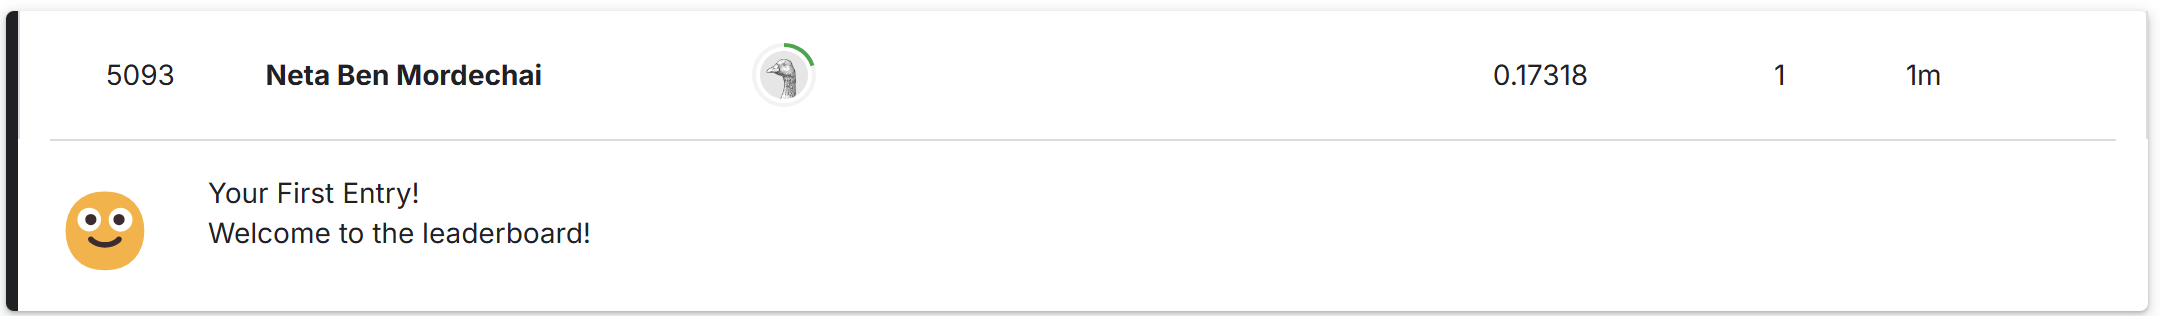

## **Summary**   
---

In this notebook, we tackled the problem of predicting house prices in Ames, Iowa, using regression techniques. We began by exploring the dataset to understand its structure, uncover patterns, and handle missing values. The preprocessing steps included encoding categorical variables, scaling numerical features, and selecting the most relevant features based on correlation analysis.  
For modeling, we implemented **Linear Regression** and **SGDRegressor**, leveraging their simplicity and efficiency for predictive tasks. We evaluated the models using metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to measure performance. After careful analysis, we selected SGDRegressor as our final model due to its flexibility and ability to handle large-scale data efficiently.  
The selected features and the scaled data were used to train the final model, and predictions were made on the test set. These predictions were then saved for submission. The goal of this project was to build a reliable predictive model for house prices that balances simplicity and accuracy, and we achieved this through careful preprocessing, model evaluation, and selection.  

**References:**  
- Lab notebooks
- Chat GPT
- Kaggle competitor notebook: https://www.kaggle.com/code/vjgupta/reach-top-10-with-simple-model-on-housing-prices#Modelling